In [1]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **S6_Mini_Project(LoR)**

## **Project_Title :  Classification – House Grade**

**Importing Libraries**

In [2]:
# For Numerical and Statistical Computations

import numpy as np
import pandas as pd

# For Visulizations

import matplotlib.pyplot as plt
import seaborn as sb

# For Scaling, Encoder and Splitting from Sci-Kit

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# For Calculating performance

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Warnings

import warnings
warnings.filterwarnings('ignore')

**Loading Data**

In [3]:
# Loading the data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASETS/DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')

# Copy of the data

df_copy = df.copy()

**Data Understanding**

In [4]:
# Preview of the data

df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [5]:
# Shape of the data

print(f"Structure \n\nRows : {df.shape[0]} and Columns : {df.shape[1]}")

Structure 

Rows : 3000 and Columns : 14


In [6]:
# Datatypes info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [7]:
# Descriptive analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


In [8]:
# Columns in df

col = list(df.columns)
col

['Id',
 'Area(total)',
 'Trooms',
 'Nbedrooms',
 'Nbwashrooms',
 'Twashrooms',
 'roof',
 'Roof(Area)',
 'Lawn(Area)',
 'Nfloors',
 'API',
 'ANB',
 'Expected price',
 'Grade']

**Observations**

* There are totally **3000 rows** and **14 columns**.

* The Id columns 3000 unique identites, we can drop.

* In this data the categorical columns are less  
    * 2 Categorical columns one is Target(**Grade**) and last one is **roof** type.

* There is no presence of **missing values** in the data, seems to be all rows are filled with data.

* From the **descriptive** 

    * The data spread might be low, bcuz STD of all columns falls below their mean values.

    * Looks like the outliers are less in the data.

**Data PreProcessing**

In [9]:
# Dropping Id Column from the data

df.drop('Id', axis = 1, inplace = True)

df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [10]:
# Renaming columns

df.rename(columns  = {'Area(total)':'total_area', 'Roof(Area)':'roof_area', 'Lawn(Area)':'lawn_area', 'Trooms':'Nrooms'}, inplace = True)

# converting all columns name to lower case

df.columns = df.columns.str.lower()

df.head()

,total_area,nrooms,nbedrooms,nbwashrooms,twashrooms,roof,roof_area,lawn_area,nfloors,api,anb,expected price,grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D


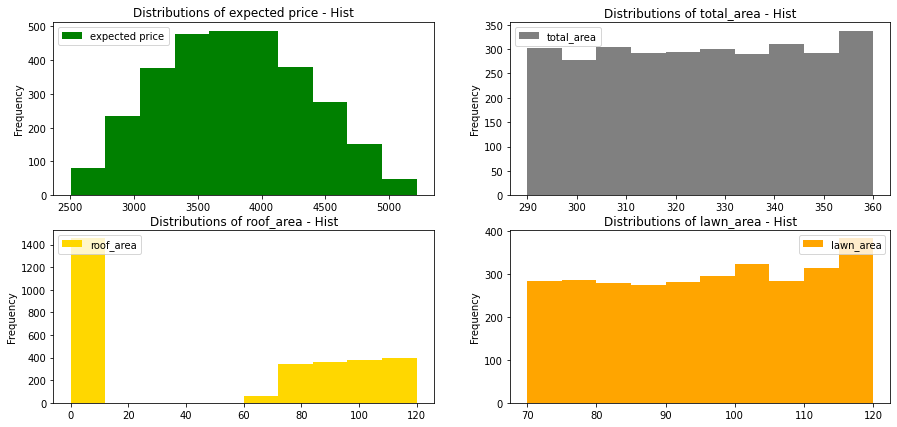

In [11]:
# Plotting distributions of features

plt.figure(figsize = (15,7))

plt.subplot(2,2,1)
plt.title('Distributions of expected price - Hist')
df['expected price'].plot(kind = 'hist', label = 'expected price', color = 'green')
plt.legend(loc = 'upper left')

plt.subplot(2,2,2)
plt.title('Distributions of total_area - Hist')
df['total_area'].plot(kind = 'hist', label = 'total_area', color = 'grey')
plt.legend(loc = 'upper left')

plt.subplot(2,2,3)
plt.title('Distributions of roof_area - Hist')
df['roof_area'].plot(kind = 'hist', label = 'roof_area', color = 'gold')
plt.legend(loc = 'upper left')

plt.subplot(2,2,4)
plt.title('Distributions of lawn_area - Hist')
df['lawn_area'].plot(kind = 'hist', label = 'lawn_area', color = 'orange')
plt.legend(loc = 'upper right')

plt.show()

# Observations

* These plots are made to check distributions and outliers.

* From this plot we can see the distribution looks **normal** for **price**.

* The impact of **outliers** is not much in price feature.

* The distributions among lawn and total area **even**.

* The distributions from roof , the roofs with min area availability is high, the area among 60 - 120 distance is quiet high and from 16-59 the availabilty is very low


#duumy

In [12]:
# Converting the two columns of grade and roof into continuous with using dumies
df_dummy = pd.get_dummies(df, columns=['roof', 'grade'])

df_dummy.head() 

,total_area,nrooms,nbedrooms,nbwashrooms,twashrooms,roof_area,lawn_area,nfloors,api,anb,expected price,roof_NO,roof_YES,grade_A,grade_B,grade_C,grade_D,grade_E
0,339,6,5,4,6,0,76,2,79,6,3481,1,0,0,0,0,1,0
1,358,5,4,3,4,71,96,3,72,4,3510,0,1,0,0,0,1,0
2,324,7,5,4,5,101,117,5,64,3,3748,0,1,0,0,1,0,0
3,330,6,4,3,5,101,82,2,59,2,3134,0,1,0,0,0,1,0
4,320,7,4,4,5,0,75,3,40,1,3843,1,0,0,0,0,1,0


In [13]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   total_area      3000 non-null   int64
 1   nrooms          3000 non-null   int64
 2   nbedrooms       3000 non-null   int64
 3   nbwashrooms     3000 non-null   int64
 4   twashrooms      3000 non-null   int64
 5   roof_area       3000 non-null   int64
 6   lawn_area       3000 non-null   int64
 7   nfloors         3000 non-null   int64
 8   api             3000 non-null   int64
 9   anb             3000 non-null   int64
 10  expected price  3000 non-null   int64
 11  roof_NO         3000 non-null   uint8
 12  roof_YES        3000 non-null   uint8
 13  grade_A         3000 non-null   uint8
 14  grade_B         3000 non-null   uint8
 15  grade_C         3000 non-null   uint8
 16  grade_D         3000 non-null   uint8
 17  grade_E         3000 non-null   uint8
dtypes: int64(11), uint8(7)
memor

* The Dummies are created for the two columns with contnious no's

# **Encoding**

In [14]:
# Select object type features

oc = df.select_dtypes('object').columns
oc

Index(['roof', 'grade'], dtype='object')

In [15]:
# using for loop to encode the ctegorical columns

for i in oc:
    df[i] = LabelEncoder().fit_transform(df[i])
    print(i)
    print(df[i].unique())
    print('--'*25)

roof
[0 1]
--------------------------------------------------
grade
[3 2 1 0 4]
--------------------------------------------------


In [16]:
# splitting the data into train and test using  train_test_split function

x = df.drop('grade', axis =1)
y = df['grade']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 20)

print("Shape of x_train - {} x_test {}".format(x_train.shape, x_test.shape))

Shape of x_train - (2100, 12) x_test (900, 12)


**Model Building**

In [17]:
# To store accuracy values and respective models

acc = {}

#*LogisticRegression*

In [18]:
# Importing LogisticRegression from scikit

from sklearn.linear_model import LogisticRegression

In [19]:
# Building the model

model_l = LogisticRegression()

# Training the model

model_l.fit(x_train, y_train)

# Prediciton

pred_l = model_l.predict(x_test)

# Model_Evaluation, accuracy, recall, precision, f1 score

print(f'Training_Score  =  {model_l.score(x_train, y_train).round(2)}\nTesting_score   =  {model_l.score(x_test, y_test).round(2)}')

print("\nAccuracy_Score  : ",accuracy_score(y_test, pred_l).round(2))

print("Recall_Score    : ",recall_score(y_test, pred_l, average = 'weighted').round(2))

print("Precision_Score : ",precision_score(y_test, pred_l, average='weighted').round(2))

print("F1_Score        : ",f1_score(y_test, pred_l, average = 'weighted').round(2))

Training_Score  =  0.55
Testing_score   =  0.55

Accuracy_Score  :  0.55
Recall_Score    :  0.55
Precision_Score :  0.52
F1_Score        :  0.53


In [20]:
# Defining calculation matrix

def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest = x_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    """
    y_predict = model.predict(x_test)
    cm = confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No","Actual - Yes"], 
                         columns=['Predicted - No','Predicted - Yes'])

    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10, 7))
    sb.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14);

              precision    recall  f1-score   support

           0       0.46      0.39      0.42       133
           1       0.33      0.31      0.32       154
           2       0.37      0.37      0.37       209
           3       0.73      0.83      0.77       385
           4       0.00      0.00      0.00        19

    accuracy                           0.55       900
   macro avg       0.38      0.38      0.38       900
weighted avg       0.52      0.55      0.53       900



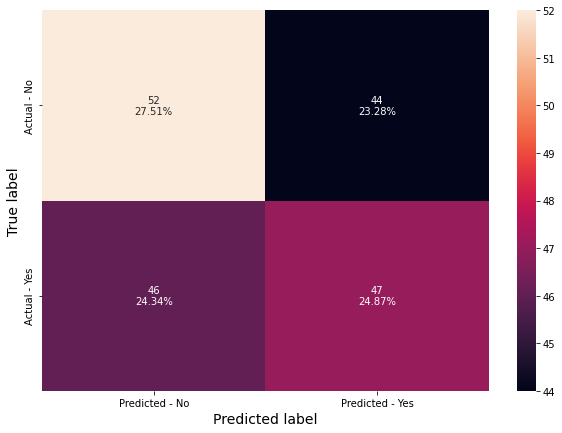

In [21]:
# Classification Report and confusion matrix

make_confusion_matrix(model_l, y_test)
print(classification_report(y_test, pred_l))

# **Observations - LOG_Regression**

* The model performance is > 50%.

* The model can able to explaine the outcome variable upto 55%.

* From the CR the 4th class has no supporter , and there is no score for precision or neither recall and etc.

> **Weighted_Average**<br>
    
* The model has 55% capability of predicting 0th class.

* The model has 52% capability of predicting 1st class.

In [22]:
# Storing accuracy value of LogisticRegression

acc['LOG_Regression'] = accuracy_score(y_test, pred_l).round(2)
acc

{'LOG_Regression': 0.55}

#*NaiveBayes*

In [23]:
# Importing naive_bayes from scikit

from sklearn.naive_bayes import GaussianNB

In [24]:
# Building the model

model_nb = GaussianNB()

# Training the model

model_nb.fit(x_train, y_train)

# Prediciton

pred_nb = model_nb.predict(x_test)

# Model_Evaluation, accuracy, recall, precision, f1 score

print(f'Training_Score  =  {model_nb.score(x_train, y_train).round(2)}\nTesting_score   =  {model_nb.score(x_test, y_test).round(2)}')

print("\nAccuracy_Score  : ",accuracy_score(y_test, pred_nb).round(2))

print("Recall_Score    : ",recall_score(y_test, pred_nb, average = 'weighted').round(2))

print("Precision_Score : ",precision_score(y_test, pred_nb, average='weighted').round(2))

print("F1_Score        : ",f1_score(y_test, pred_nb, average = 'weighted').round(2))

Training_Score  =  0.8
Testing_score   =  0.81

Accuracy_Score  :  0.81
Recall_Score    :  0.81
Precision_Score :  0.83
F1_Score        :  0.82


In [25]:
# Classification Report

print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       133
           1       0.67      0.80      0.73       154
           2       0.72      0.72      0.72       209
           3       0.94      0.85      0.89       385
           4       0.55      0.95      0.69        19

    accuracy                           0.81       900
   macro avg       0.75      0.83      0.78       900
weighted avg       0.83      0.81      0.82       900



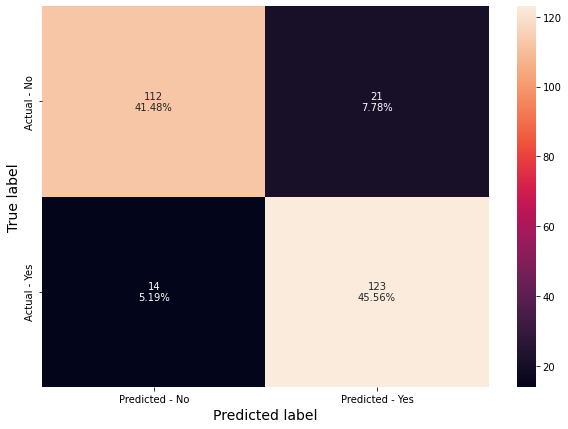

In [26]:
# Confusion_matrix

make_confusion_matrix(model_nb, y_test)

# **Observations - Naive_Bayes**

* The model performance is > 80%.

* The model can able to explaine the outcome variable upto 81%.



> **Weighted_Average**


* The model has 81% capability of predicting 0th class.

* The model has 83% capability of predicting 1st class.

Results

* The **Naive_Bayes** model performs better than **LogisticRegression**

In [27]:
# Storing accuracy value of LogisticRegression

acc['Naive_Bayes'] = accuracy_score(y_test, pred_nb).round(2)
acc

{'LOG_Regression': 0.55, 'Naive_Bayes': 0.81}

#*Decision_Tree*

In [28]:
# Importing DecisionTreeClassifier from scikit

from sklearn.tree import DecisionTreeClassifier

In [29]:
# Building the model

model_dt = DecisionTreeClassifier()

# Training the model

model_dt.fit(x_train, y_train)

# Prediciton

pred_dt = model_dt.predict(x_test)

# Model_Evaluation, accuracy, recall, precision, f1 score


print(f'Training_Score  =  {model_dt.score(x_train, y_train).round(2)}\nTesting_score   =  {model_dt.score(x_test, y_test).round(2)}')

print("\nAccuracy_Score  : ",accuracy_score(y_test, pred_dt).round(2))

print("Recall_Score    : ",recall_score(y_test, pred_dt, average = 'weighted').round(2))

print("Precision_Score : ",precision_score(y_test, pred_dt, average='weighted').round(2))

print("F1_Score        : ",f1_score(y_test, pred_dt, average = 'weighted').round(2))

Training_Score  =  1.0
Testing_score   =  0.85

Accuracy_Score  :  0.85
Recall_Score    :  0.85
Precision_Score :  0.85
F1_Score        :  0.85


In [30]:
# Classification Report

print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       133
           1       0.76      0.77      0.76       154
           2       0.83      0.81      0.82       209
           3       0.92      0.92      0.92       385
           4       0.59      0.68      0.63        19

    accuracy                           0.85       900
   macro avg       0.79      0.81      0.80       900
weighted avg       0.85      0.85      0.85       900



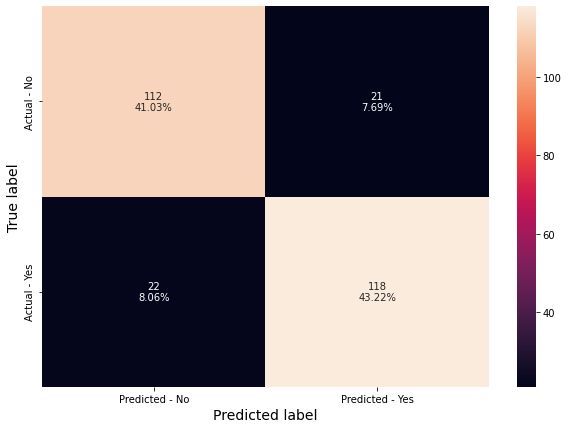

In [31]:
# Confusion_matrix

make_confusion_matrix(model_dt, y_test)

# **Observations - DecisionTreeClassifier**

* The model performance is > 80% same as Naive_Bayes.

* The model can able to explaine the outcome variable upto 85% which is > Naive_Bayes.

* This model looks like overfitted.

> **Weighted_Average**

* The model has 85% capability of predicting 0th class.

* The model has 85% capability of predicting 1st class.

Results

* The **DecisionTreeClassifier** model performs better than **LogisticRegression and Naive_Bayes as well**

In [32]:
# Storing accuracy value of LogisticRegression

acc['DecisionTree'] = accuracy_score(y_test, pred_dt).round(2)
acc

{'LOG_Regression': 0.55, 'Naive_Bayes': 0.81, 'DecisionTree': 0.85}

#*RandomForest*

In [33]:
# Importing RandomForestClassifier from scikit

from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import StratifiedKFold, cross_val_score

In [34]:
# Building the model with hp

model_rf = RandomForestClassifier(n_estimators = 10, n_jobs = -1, random_state = 15, max_depth = 5)

# Training the model

model_rf.fit(x_train, y_train)

# Prediciton

pred_rf = model_rf.predict(x_test)

# Model_Evaluation, accuracy, recall, precision, f1 score

print(f'Training_Score  =  {model_rf.score(x_train, y_train).round(2)}\nTesting_score   =  {model_rf.score(x_test, y_test).round(2)}')

print("\nAccuracy_Score  : ",accuracy_score(y_test, pred_rf).round(2))

print("Recall_Score    : ",recall_score(y_test, pred_rf, average = 'weighted').round(2))

print("Precision_Score : ",precision_score(y_test, pred_rf, average='weighted').round(2))

print("F1_Score        : ",f1_score(y_test, pred_rf, average = 'weighted').round(2))

# Using Cross validation 

cv = StratifiedKFold(n_splits = 10, shuffle = True, )
score = cross_val_score(model_rf, x_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise')

# accuracy

print("\n Mean_score : {} \n std_score  : {} ".format(np.mean(score).round(2),np.std(score).round(2)))

Training_Score  =  0.84
Testing_score   =  0.83

Accuracy_Score  :  0.83
Recall_Score    :  0.83
Precision_Score :  0.81
F1_Score        :  0.82

 Mean_score : 0.81 
 std_score  : 0.03 


In [35]:
# Classification Report

print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       133
           1       0.76      0.77      0.76       154
           2       0.83      0.81      0.82       209
           3       0.92      0.92      0.92       385
           4       0.59      0.68      0.63        19

    accuracy                           0.85       900
   macro avg       0.79      0.81      0.80       900
weighted avg       0.85      0.85      0.85       900



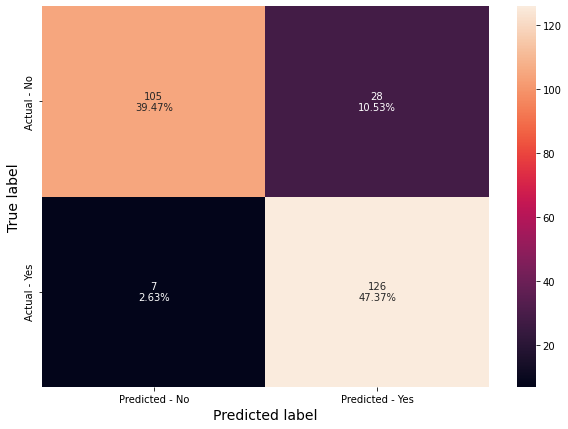

In [36]:
# Confusion_matrix

make_confusion_matrix(model_rf, y_test)

# **Observations - RandomForestClassifier**

* The model performance is > 80%.

* The model can able to explaine the outcome variable upto 85% which is  
~= **Decision_Tree**.

> **Weighted_Average**

* The model has 83% capability of predicting 0th class.

* The model has 81% capability of predicting 1st class.

Results

* The **RandomForestClassifier** model performs better than **LogisticRegression and Naive_Bayes as well** and equals **DecisionTreeClassifier**

In [37]:
# Storing accuracy value of LogisticRegression

acc['RandomForest'] = accuracy_score(y_test, pred_rf).round(2)
acc

{'LOG_Regression': 0.55,
 'Naive_Bayes': 0.81,
 'DecisionTree': 0.85,
 'RandomForest': 0.83}

#*KNN_Classifier*

In [38]:
# Impoting KNN and GridsearchCV library from scikit 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [39]:
# Finding Neighobors using Grid Searcg

knn = KNeighborsClassifier()

params = {'n_neighbors':[10,11,12,13,14,15,16,17,18,19,20]}

grid = GridSearchCV(knn, params, cv=5, scoring = 'accuracy')
grid.fit(x_train, y_train)

print("Best Parameters : ", grid.best_params_)
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid.best_score_) )

Best Parameters :  {'n_neighbors': 16}
Accuracy for our training dataset with tuning is : 0.56%


In [40]:
# Building the model with hp

model_kn = KNeighborsClassifier(n_neighbors = 16, n_jobs = -1)

# Training the model

model_kn.fit(x_train, y_train)

# Prediciton

pred_kn = model_kn.predict(x_test)

# Model_Evaluation, accuracy, recall, precision, f1 score


print(f'Training_Score  =  {model_kn.score(x_train, y_train).round(2)}\nTesting_score   =  {model_kn.score(x_test, y_test).round(2)}')

print("\nAccuracy_Score  : ",accuracy_score(y_test, pred_kn).round(2))

print("Recall_Score    : ",recall_score(y_test, pred_kn, average = 'weighted').round(2))

print("Precision_Score : ",precision_score(y_test, pred_kn, average='weighted').round(2))

print("F1_Score        : ",f1_score(y_test, pred_kn, average = 'weighted').round(2))

Training_Score  =  0.62
Testing_score   =  0.57

Accuracy_Score  :  0.57
Recall_Score    :  0.57
Precision_Score :  0.55
F1_Score        :  0.56


In [41]:
# Classification Report

print(classification_report(y_test, pred_kn))

              precision    recall  f1-score   support

           0       0.54      0.44      0.49       133
           1       0.35      0.41      0.38       154
           2       0.42      0.35      0.38       209
           3       0.74      0.83      0.78       385
           4       0.00      0.00      0.00        19

    accuracy                           0.57       900
   macro avg       0.41      0.41      0.40       900
weighted avg       0.55      0.57      0.56       900



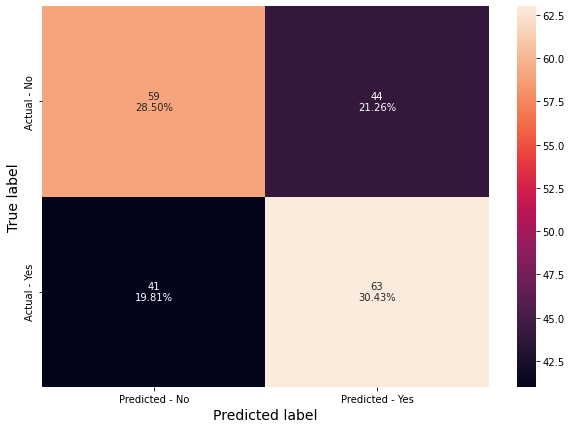

In [42]:
# Confusion_matrix

make_confusion_matrix(model_kn, y_test)

# **Observations - KNeighborsClassifier**

* The model performance is > 50%.

* The model can able to explaine the outcome variable upto 57% which is  
~= **LR**.

> **Weighted_Average**

* The model has 57% capability of predicting 0th class.

* The model has 55% capability of predicting 1st class.

Results

* The **KNeighborsClassifier** model performs .2% better than **LogisticRegression** and less tham **Naive_Bayes, DecisionTreeClassifier and Random_Forest**

In [43]:
# Storing accuracy value of LogisticRegression

acc['KNeighbors'] = accuracy_score(y_test, pred_kn).round(2)

In [44]:
# Sorting the accuracy scores

accuracy = dict(sorted(acc.items(), key=lambda x : x[1]))
accuracy

{'LOG_Regression': 0.55,
 'KNeighbors': 0.57,
 'Naive_Bayes': 0.81,
 'RandomForest': 0.83,
 'DecisionTree': 0.85}

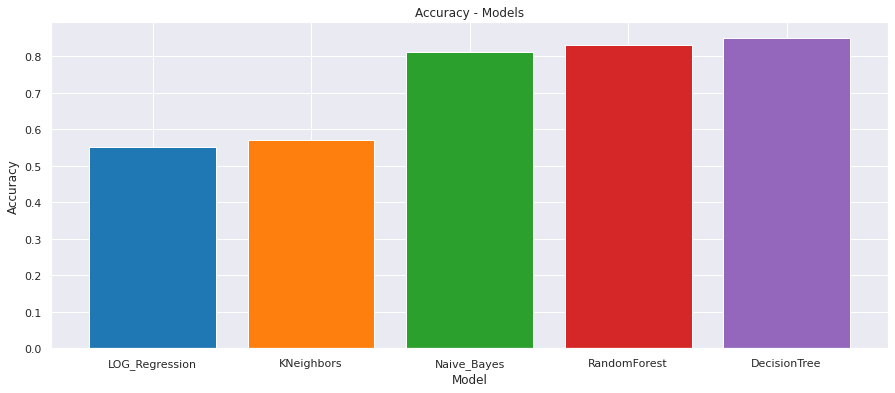

In [45]:
# Plotting accuracy scores of the respective models each.

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

sb.set(style='darkgrid')
names = list(accuracy.keys())
values = list(accuracy.values())
plt.figure(figsize = (15,6))
plt.title('Accuracy - Models')
plt.bar(x = names, height = values, tick_label = names, color = colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# **Conclusions**

* From this chart we can see the Accuracy values for 5 different models.

* The models which gives better result are  **RandomForest,Naive_bayes and DecisionTree** having scores > **80%**.

* The models which give average performance are **Logistic and Knn** whose scores are < **60**%

# **Model_Conclusions**

* DTC is not a good approach because earlier we noticed that model seems to be overfitted.

* Finally, **RandomForest or Naive bayes** can be used to build the data to get better prediction and performance.

* From the confusion matrix Naive_bayes can be considered to build.



# **EDA**

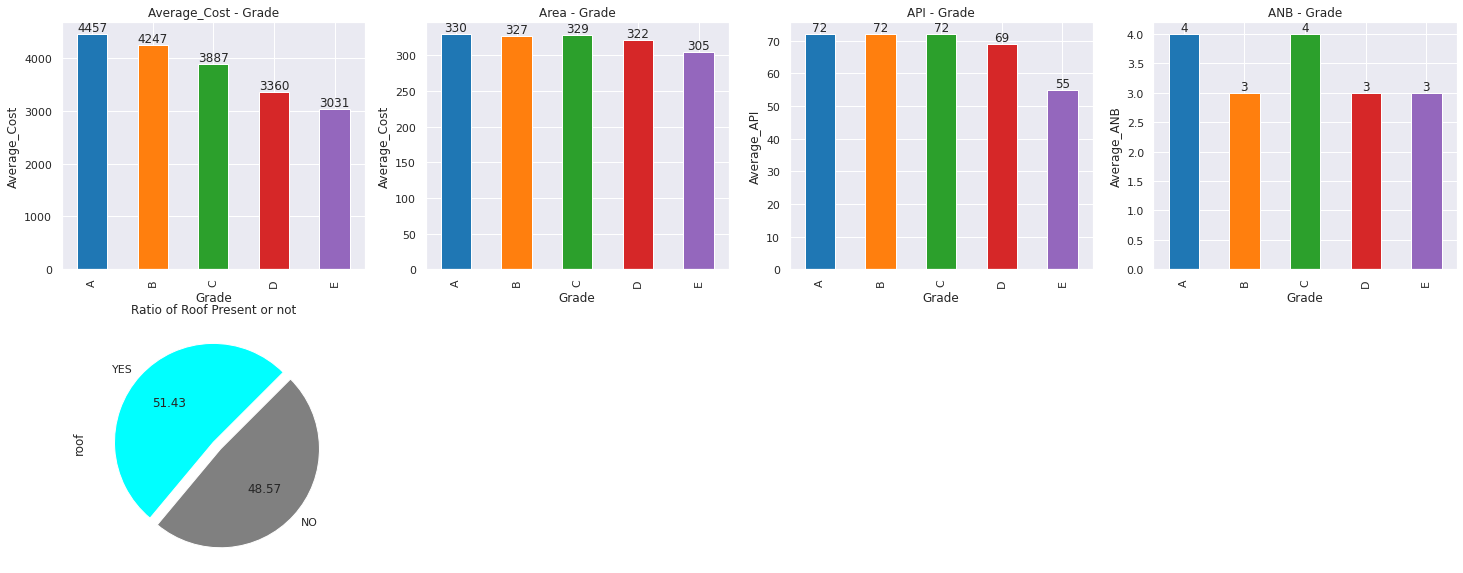

In [46]:
# Plotting average cost of building grades wise

plt.figure(figsize = (25,10))

plt.subplot(241)
plt.title("Average_Cost - Grade")
plt.ylabel('Average_Cost')
ax = df_copy.groupby('Grade')['Expected price'].mean().round().plot(kind = 'bar', color = colors)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')

# Plotting average cost of building area wise

plt.subplot(242)
plt.title("Area - Grade")
plt.ylabel('Average_Cost')
ax = df_copy.groupby('Grade')['Area(total)'].mean().round().plot(kind = 'bar', color = colors)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')

# Plotting average API of building Grade wise

plt.subplot(243)
# plt.figure(figsize = (6,6))
plt.title("API - Grade")
plt.ylabel('Average_API')
ax = df_copy.groupby('Grade')['API'].mean().round().plot(kind = 'bar', color = colors)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')

# Plotting average Anb of building Grade wise

plt.subplot(244)
# plt.figure(figsize = (6,6))
plt.title("ANB - Grade")
plt.ylabel('Average_ANB')
ax = df_copy.groupby('Grade')['ANB'].mean().round().plot(kind = 'bar', color = colors)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')

# Plotting Ratio of Roof Present or not 

plt.subplot(245)
plt.title('Ratio of Roof Present or not')
df_copy['roof'].value_counts().plot(kind = 'pie', autopct = '%.2f', explode = [0,0.1], startangle = 45, colors = ['cyan','grey'])

plt.show()

# Observations

* The average cost of a best grade A & B rooms is > **$4500**

* To get a Medium quality rooms the average cost is < **$4000**

* To get a cheapest room the average cost is <  **$3500**

* The average area for each types of grade rooms are similar

* There is a 51% of getting a with roof.

* The API values are good for Gardes A,B,C and slight low values for remaining D and E.

* The ANB values are good for Gardes A,C and slight low values for remaining B, D and E.
